### Welcome to the module on Advanced Regression. In this module, we will learn how to deal with variables which do not exhibit a linear relationship with the target variable. Furthermore, we will learn how to avoid the perils of overfitting and make a generalisable model.

- Lets start off with a quick recap of simple linear regression. In the first example. we will try to model sales of an online retailer with the help of the marketing spend. Lets see how we go about it

### 1.1 Simple Linear Regression

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## filtering/supressing warnings
import warnings
warnings.filterwarnings('ignore')

#### We will build a model using TV spend on advertisements to predict sales

In [4]:
## importing the dataset
df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

#### checking out the dataset

In [5]:
## head
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
## shape
df.shape

(200, 4)

In [7]:
## null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- No null values and datatypes are in order

In [8]:
## outliers
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


- No indication of ouliers; not much difference between mean and median

### Checking for linear relationships

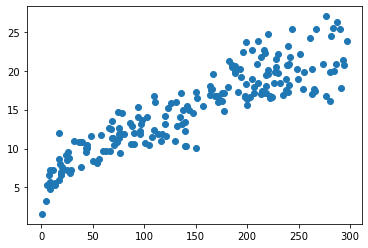

In [9]:
plt.scatter(x = 'TV',y ='Sales',data=df)
plt.show()

In [10]:
a = df[['TV','Radio','Newspaper']]
a.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


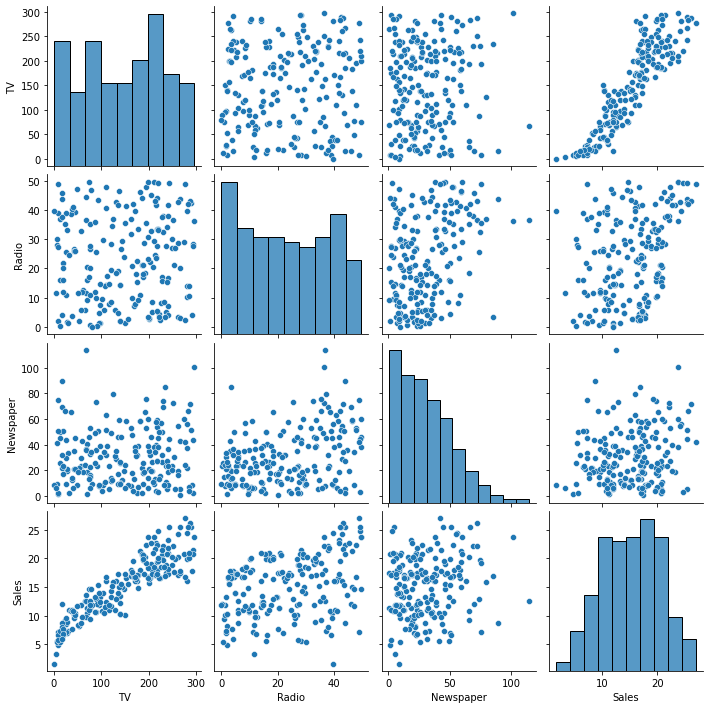

In [11]:
import seaborn as sns
sns.pairplot(df)
plt.show()

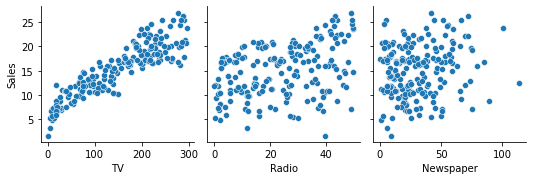

In [12]:
## Another way to visualise
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],diag_kind=None)
plt.show()

As we can infer from the above plot, the relationship between the `TV` and `Sales` variables seems to be linear.

## Building Model

### Splitting into X and y labels

In [13]:
## splitting
X = df['TV']
y = df['Sales']

In [14]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [15]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [16]:
print(X.shape)
print(type(X))

(200,)
<class 'pandas.core.series.Series'>


In [17]:
print(y.shape)
print(type(y))

(200,)
<class 'pandas.core.series.Series'>


- X and y are numpy series. We'd have to convert them to Numpy arrays
- X.shape()-> (200, ) i.e a numpy series. 
- It has to be something like (200, 1) to be fit into the lr model using LinearRegression class as it takes a 2-D array as input. We'd have to do some reshaping.

### Reshaping X and y to be able to fit into the LR model

In [18]:
## reshaping X
X = X.values.reshape(-1,1)
print(X.shape)
print(type(X))

(200, 1)
<class 'numpy.ndarray'>


In [19]:
## reshaping y
y = y.values.reshape(-1,1)
print(y.shape)
print(type(y))

(200, 1)
<class 'numpy.ndarray'>


- Shape of both X and y has been chaged to 2-D arrays from 1-D numpy series
- Now both X and y are ready to be fed into LR model using LinearRegression of Sklearn
- No need for this conversion when we use statsmodels.api

### Building the regression model

In [20]:
## importing the libraries
from sklearn.linear_model import LinearRegression

In [21]:
## Instantiaing object
Lm = LinearRegression()

In [22]:
## fitting the object
lm = Lm.fit(X,y)

### Making predictions

In [23]:
y_pred = lm.predict(X)

### Evaluating model metrics
- R-Squared
- Visualising Model Fit
- Checking Coefficients b0 and b1

In [24]:
## importing libraries
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
## R-squared
r2_score(y,y_pred)

0.8121757029987414

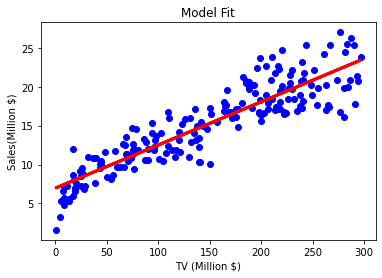

In [26]:
## visualising the model fit
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red',linewidth=3)
plt.title('Model Fit')
plt.xlabel('TV (Million $)')
plt.ylabel('Sales(Million $)')
plt.show()

In [27]:
## checking model coefficients b0 and b1
print('Intercept-b0:',lm.intercept_)
print('Slope-b1:',lm.coef_)

Intercept-b0: [6.97482149]
Slope-b1: [[0.05546477]]


In [28]:
print(lm.intercept_)
print(lm.coef_)

[6.97482149]
[[0.05546477]]


- The eqaution for Simple linear regression model
   - yᵢ = b₀ + b₁Xᵢ
- The values for  b₀ and b₁ from the model we built
 b₀ = 6.97482149
 b₁ = 0.05546477
- Our equation becomes:
   - yᵢ = 6.97482149 + 0.05546477Xᵢ

- If we were building the model using statsmodels we could've used lm.params

###### Metrics to assess model performance
- RSS
- MSE
- RMSE

In [29]:
## RSS = ∑(y - y_pred)²
RSS = np.sum(np.square(y-y_pred))
print(RSS)

1043.5487795590257


In [30]:
## MSE = RSS/N
MSE = mean_squared_error(y,y_pred)
print(MSE)

5.2177438977951285


In [31]:
1043.5487795590257/200

5.2177438977951285

In [32]:
## Another way to get MSE
RSS/200

5.2177438977951285

In [33]:
## RMSE = √MSE
RMSE = MSE**.5
print(RMSE)

2.2842381438447106


## Checking for assumptions

### Residual Analysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

In [34]:
## computing residuals
res = y - y_pred

In [35]:
res.shape

(200, 1)

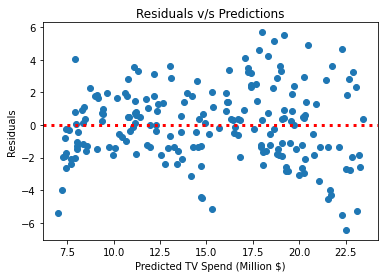

In [36]:
## Residuals v/s Predictions plot
plt.scatter(y_pred,res)
plt.title('Residuals v/s Predictions')
plt.xlabel('Predicted TV Spend (Million $)')
plt.ylabel('Residuals')
plt.axhline(y=0,color='red',linestyle=':',linewidth=3)
plt.show()

- Error terms do not show:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers

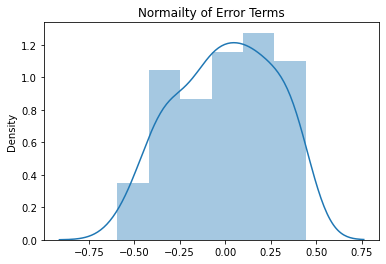

In [205]:
## Histogram of the error terms
sns.distplot(res)
plt.title('Normailty of Error Terms')
plt.show()

- Error terms show an apporoximate normal distribution

### Normal Equations

#### Regression Equation
$\hat{y_i} = b_{0} + b_{1}{x_i}$<br>
where slope of trend line is calculated as:<br>
$b_{1}=\frac{\sum (x_i-\bar{x})*(y_i-\bar{y})}{\sum (x_i-\bar{x})^{2}}$<br>
and the intercept is computed as:<br>
$b_{0}=\bar{y}-b_{1}\bar{x}$

In [38]:
X = df['TV'].values

In [39]:
Y = df['Sales'].values

In [40]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(X_mean)
print(Y_mean)

147.0425
15.130500000000001


In [41]:
n = len(X)
n

200

In [42]:
## calculating slope b1
numr = 0
denom = 0

for i in range(0,n):
    
    numr = numr + (X[i] - X_mean)*(Y[i]-Y_mean)
    denom = denom + (X[i] - X_mean)**2
b1 = numr/denom
print('Coefficient b1:',b1)
   

Coefficient b1: 0.05546477046955879


In [43]:
## calculating the intercept b0
b0 = Y_mean - b1*X_mean
print('Coefficient b0:',b0)

Coefficient b0: 6.974821488229903


### Linear Regression Model Estimates using Matrix Multiplications
- Best parameter values through normal equations using matrices.
- To get RSS, we multiply the tarnspose of error matrix to the error matirx.
- To get the best values for β, we differentiate RSS wrt β and we equate it to zero.
- WE get the following resultant equation

$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [44]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(200,)


In [45]:
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(200,)


- AS we can see that X and Y are a 1-D array
- Now going back to the orignal math equation, we need to convert X to a 2-D array with first column having all 1's which correspond to the β terms.(Refer to notes register)
- We will use Numpy's vstack to perform this action.
   - Stack arrays in sequence vertically (row wise).
   - This is equivalent to concatenation along the first axis after 1-D arrays
      of shape `(N,)` have been reshaped to `(1,N)`. Rebuilds arrays divided by
        `vsplit`.
    - np.vstack(tup)
   - Vstack would stack a row of 1's over the X matrix,but we need a column of 1's.
   - So wee will use .T to trasnpose the matrix so that we get a column of 1's

In [46]:
## Using Numpy's vstack to create x_mat
## it is stacking the column of 1's with the values of X
## .T because np.vstack(np.ones(),X) would stack a row of ones on X, to convert that
## row of 1's we have used .T which gives the transpose of the matrix
## x_mat without .T
x_mat = np.vstack((np.ones(len(X)),X))
x_mat

array([[  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
      

In [47]:
## converting this using .T
x_mat = x_mat.T
x_mat

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

- We dont need to convert Y

### Getting back to the equation

$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

- We can implement this using NumPy’s linalg module’s matrix inverse function and matrix multiplication function

- linalg : The Linear Algebra module of NumPy offers various methods to apply linear algebra on any numpy array.
- One can find:rank, determinant, trace, etc. of an array.eigen values of matrices,matrix and vector products (dot, inner, outer,etc. product), matrix exponentiation,solve linear or tensor equations and much more!

In [48]:
beta_hat = np.linalg.inv(x_mat.T.dot(x_mat)).dot(x_mat.T.dot(Y))
beta_hat

array([6.97482149, 0.05546477])

 - The values of `b0` and `b1` are the same as found through `.intercept_` and `.coef_` and also the same as we found through `simple algebric eqautions`.
- But matrices have advantage as discussed in notes register

## 1.2 Multiple Linear Regression


#### We predict the sales based on the expenditure on TV, Radio and Newspaper advertisements

In [49]:
# Importing the dataset
df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

### checking out the dataset

In [50]:
## head
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
## null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [52]:
## outliers
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [53]:
## shape
df.shape

(200, 4)

### Looking for linear relationships
- WE have 2 approaches
  - use plt.scatter and individually plot sales vs other three columns
  - use sns.pairplot with diag_kind=None

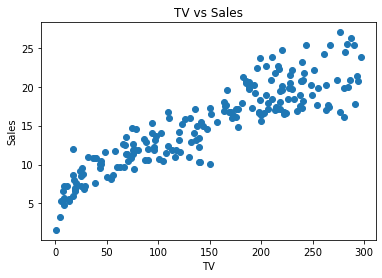

In [54]:
## using plt.scatter tv vs sales
plt.scatter(x='TV',y='Sales',data=df)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

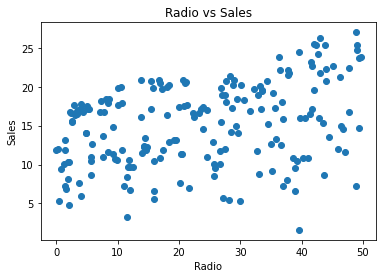

In [55]:
## using plt.scatter Radio vs sales
plt.scatter(x='Radio',y='Sales',data=df)
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

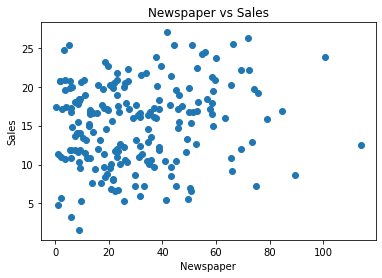

In [56]:
## using plt.scatter Newspaper vs sales
plt.scatter(x='Newspaper',y='Sales',data=df)
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

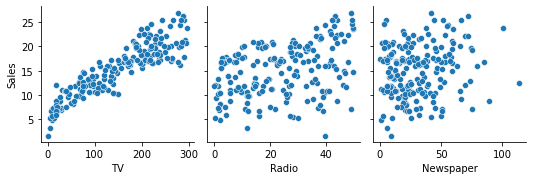

In [57]:
## using sns.pairplot
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',diag_kind=None)
plt.show()

- We will build the model while incorporating all the Independent variables 

## Building the model

### Creating X and y lables

In [58]:
X = df[['TV','Radio','Newspaper']]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [59]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [60]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(200, 3)
<class 'pandas.core.frame.DataFrame'>
(200,)
<class 'pandas.core.series.Series'>


- As we are going to use LinearRegressio fro Sklearn, we need to reshape y into a 2-D numpy array, as Sklearn expects y to be in that shape.

In [61]:
## reshaping y
y = y.values.reshape(-1,1)
print(y.shape)
print(type(y))

(200, 1)
<class 'numpy.ndarray'>


- Issue is fixed, now we can proceed further.

In [62]:
## importing the libraries
from sklearn.linear_model import LinearRegression

In [63]:
## instantiating object
lm = LinearRegression()

In [64]:
## fitting the object
mlr = lm.fit(X,y)

In [65]:
## making predictions
y_pred = mlr.predict(X)

### Evaluating model metrics
- R-Squared
- Visualising Model Fit
- Checking Coefficients b0 and b1

In [66]:
## importing libraries
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
## R-Squared
r2_score(y,y_pred)

0.9025912899684558

#### Visualising Model Fit 

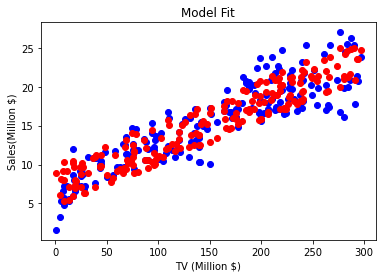

In [68]:
## Visual comparison between predicted and actual values for TV
plt.scatter(X['TV'],y,color='blue') ## actual values 
plt.scatter(X['TV'],y_pred,color='red') ## predicted values
plt.title('Model Fit')
plt.xlabel('TV (Million $)')
plt.ylabel('Sales(Million $)')
plt.show()

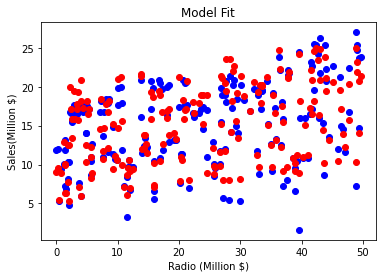

In [69]:
## Visual comparison between predicted and actual values for Radio
plt.scatter(X['Radio'],y,color='blue') ## actual values 
plt.scatter(X['Radio'],y_pred,color='red') ## predicted values
plt.title('Model Fit')
plt.xlabel('Radio (Million $)')
plt.ylabel('Sales(Million $)')
plt.show()

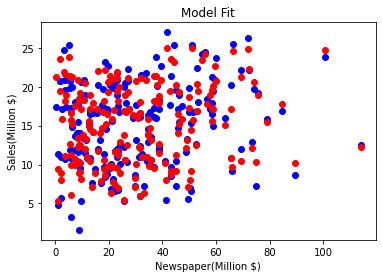

In [70]:
## Visual comparison between predicted and actual values for Newspaper 
plt.scatter(X['Newspaper'],y,color='blue') ## actual values 
plt.scatter(X['Newspaper'],y_pred,color='red') ## predicted values
plt.title('Model Fit')
plt.xlabel('Newspaper(Million $)')
plt.ylabel('Sales(Million $)')
plt.show()

In [71]:
## checking coefficients b0 and b1
b0 = mlr.intercept_
b1 = mlr.coef_
print('The value of b0 is:',b0)
print('The value of b1 is:',b1)

The value of b0 is: [4.62512408]
The value of b1 is: [[0.05444578 0.10700123 0.00033566]]


### Metrics to assess model performance
- RSS
- MSE
- RMSE

In [72]:
## RSS = ∑(y - y_pred)²
RSS = np.sum(np.square(y - y_pred))
print(RSS)

541.2012295254631


In [73]:
## MSE = RSS/N
n = len(X)
MSE = RSS/n
print(MSE)

2.706006147627315


In [74]:
## another way to find MSE
print(mean_squared_error(y,y_pred))

2.706006147627315


In [75]:
## RMSE = √MSE
print(MSE**.5)

1.6449942697855562


## Checking for assumptions

### Residual Analysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

In [76]:
## residuals
res = (y-y_pred)

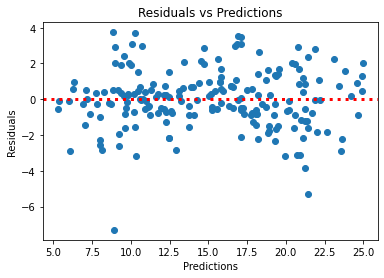

In [77]:
## residuals vs predictions plot
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red',linestyle=':',linewidth=3)
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()


- No patterns

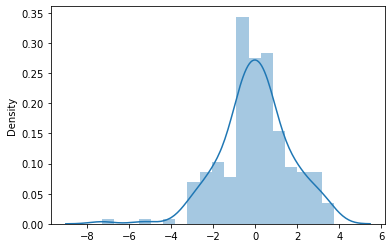

In [78]:
## Histogram of the error terms
sns.distplot(res)
plt.show()

- Fairly `Normal` Distribution 

### Linear Regression Model Estimates using Matrix Multiplications
- Best parameter values through normal equations using matrices.
- To get RSS, we multiply the tarnspose of error matrix to the error matirx.
- To get the best values for β, we differentiate RSS wrt β and we equate it to zero.
- WE get the following resultant equation

#### $\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [79]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(200, 3)
<class 'pandas.core.frame.DataFrame'>
(200, 1)
<class 'numpy.ndarray'>


In [80]:
x_mat = np.vstack((np.ones(len(X)), X.T)).T

In [81]:
x_mat.shape

(200, 4)

- We do X.T in np.vstack((np.ones(len(X)), X.T)) becuase:
  - All the input array dimensions for the concatenation axis must match exactly
  - np.ones(len(X)) produces an array of 200 columns(len(X)) and 1 row.
  - And the shape of X is 200 rows and 3 columns.
  - So, we transpose X using X.T, this Xᵀ(transposed) matrix has 200 columns and 3 rows.
  - Now we can concat the np.ones(len(X)) on top of Xᵀ(transposed) matrix
  - And finally we again tarnspose this matrix to get a new matrix with 200 rows and 4 columns.

### Calculating beta hat
#### $\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [82]:
beta_hat = np.linalg.inv(x_mat.T.dot(x_mat)).dot(x_mat.T.dot(y))

In [83]:
beta_hat

array([[4.62512408e+00],
       [5.44457803e-02],
       [1.07001228e-01],
       [3.35657922e-04]])

- Since there are multiple values for beta_hat i.e b0,b1,b2 and b3, solving these my mathematical equations would've been useless.

In [84]:
beta_hat_list = [ beta_hat[i][0] for i in range(len(beta_hat))]
beta_hat_list

[4.625124078808675,
 0.05444578033757087,
 0.1070012282387025,
 0.00033565792233059]

In [85]:
beta_hat_array = [ beta_hat[i] for i in range(len(beta_hat))]
beta_hat_array

[array([4.62512408]),
 array([0.05444578]),
 array([0.10700123]),
 array([0.00033566])]

- beta_hat[i] would've returned a list of arrays
- we want values for betas,hence beta[i][0]

In [86]:
coefficients = ['b0','b1(TV)','b2(Radio)','b3(Newspaper)']

In [87]:
## using zip() fucntion to join the two lists like a zip and storing
## the resultant list as a dictionary
betas = dict(zip(beta_hat_list,coefficients))
betas

{4.625124078808675: 'b0',
 0.05444578033757087: 'b1(TV)',
 0.1070012282387025: 'b2(Radio)',
 0.00033565792233059: 'b3(Newspaper)'}

In [88]:
betas.items()

dict_items([(4.625124078808675, 'b0'), (0.05444578033757087, 'b1(TV)'), (0.1070012282387025, 'b2(Radio)'), (0.00033565792233059, 'b3(Newspaper)')])

In [89]:
test_list = []
for a,b in betas.items():
    test_list.append(a)
test_list

[4.625124078808675,
 0.05444578033757087,
 0.1070012282387025,
 0.00033565792233059]

# Modeling non-linear relationships using data transformation

- Here, we need to make a model which predicts how much distance is covered by a truck in a given time unit after a break is applied.

In [90]:
dist = pd.read_csv('test.csv')

#### checking out the dataframe

In [91]:
##head
dist.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


In [92]:
## null and dtype
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      120 non-null    int64  
 1   distance  120 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [93]:
## shape
dist.shape

(120, 2)

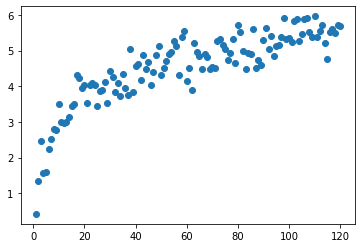

In [94]:
## checking for linear relationship
plt.scatter(x='time',y='distance',data=dist)
plt.show()

- Not exactly linear, we can see sort of curve which indicates a non-linear relatiioship.
- First we will just fit a linear regression model and then see how it fares

### Making Linear regression model using Sklearn

In [95]:
## Creating X and y labels
X = dist['time']
y = dist['distance']

In [96]:
## checking type and shape of X and y
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(120,)
<class 'pandas.core.series.Series'>
(120,)
<class 'pandas.core.series.Series'>


In [97]:
## We need to reshape X and y to 2-d arrays so that they can be fed into 
## LinearRegression class of sklearn
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [98]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(120, 1)
<class 'numpy.ndarray'>
(120, 1)
<class 'numpy.ndarray'>


- Now both X and y are in desired shape, so we can go ahead with the model

In [99]:
## importing libraries
from sklearn.linear_model import LinearRegression

In [100]:
## instantiating object
lr = LinearRegression()

In [101]:
## fitting object
lr = lr.fit(X,y)

In [102]:
## making prediction
y_pred = lr.predict(X)
y_pred

array([[3.03727697],
       [3.06222059],
       [3.0871642 ],
       [3.11210782],
       [3.13705144],
       [3.16199506],
       [3.18693868],
       [3.2118823 ],
       [3.23682592],
       [3.26176954],
       [3.28671316],
       [3.31165678],
       [3.3366004 ],
       [3.36154402],
       [3.38648763],
       [3.41143125],
       [3.43637487],
       [3.46131849],
       [3.48626211],
       [3.51120573],
       [3.53614935],
       [3.56109297],
       [3.58603659],
       [3.61098021],
       [3.63592383],
       [3.66086745],
       [3.68581106],
       [3.71075468],
       [3.7356983 ],
       [3.76064192],
       [3.78558554],
       [3.81052916],
       [3.83547278],
       [3.8604164 ],
       [3.88536002],
       [3.91030364],
       [3.93524726],
       [3.96019088],
       [3.98513449],
       [4.01007811],
       [4.03502173],
       [4.05996535],
       [4.08490897],
       [4.10985259],
       [4.13479621],
       [4.15973983],
       [4.18468345],
       [4.209

In [103]:
y

array([[0.41966   ],
       [1.35069213],
       [2.47034226],
       [1.56685623],
       [1.59527998],
       [2.22733661],
       [2.51384208],
       [2.79276262],
       [2.76086241],
       [3.5074415 ],
       [3.0073645 ],
       [2.96615464],
       [3.00940612],
       [3.14476831],
       [3.45503095],
       [3.48817952],
       [4.30250133],
       [4.23471276],
       [3.94445788],
       [4.03220981],
       [3.53740283],
       [4.03234279],
       [4.09290521],
       [4.03203965],
       [3.43447421],
       [3.86356302],
       [3.88175868],
       [4.1175302 ],
       [3.53149929],
       [4.41594644],
       [4.26245403],
       [3.83512172],
       [4.09931898],
       [3.71114673],
       [4.3284741 ],
       [3.94341202],
       [3.76619357],
       [5.04446579],
       [3.8377705 ],
       [4.56731475],
       [4.63381803],
       [4.17408727],
       [4.86781974],
       [4.49278678],
       [4.66681571],
       [4.04167813],
       [4.38492144],
       [4.883

In [104]:
## R-Squared
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7019700219367477

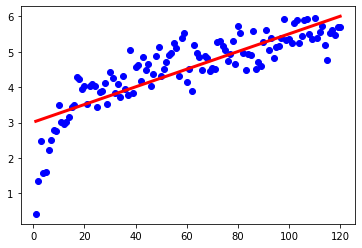

In [105]:
## making the scatter plot to check our model
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red',linewidth=3)
plt.show()

- Though R-squared is around 71%,the line is not a good fit!
- Remember, no matter how scattered the data, LinearRegression will always try to fit a line.

### Calculating other metrics

In [106]:
## checking out the coefficiets
b0 = lr.intercept_
b1 = lr.coef_
print('The value of b0:',b0)
print('The value of b1:',b1)

The value of b0: [3.01233335]
The value of b1: [[0.02494362]]


In [107]:
## RSS = 𝛴 (y-y_pred)²
RSS = np.sum(np.square(y-y_pred))
RSS


38.035808448707726

In [108]:
## MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
MSE

0.3169650704058977

In [109]:
## another way to calculate MSE
n = len(X)
MSE = RSS/n
MSE

0.3169650704058977

In [110]:
## calculating RMSE: RMSE = √MSE
RMSE = MSE**.5
RMSE

0.5629965101187553

### Residual analysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

In [111]:
## making res variable
res = y - y_pred

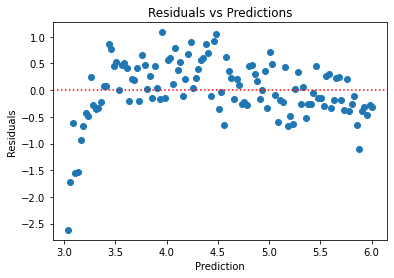

In [112]:
## residuals vs predictions plot
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals vs Predictions')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

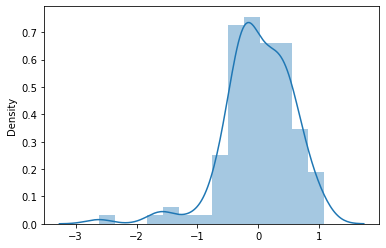

In [113]:
## Histogram of the error terms
sns.distplot(res)
plt.show()

- We ca see violations of the suumptions of linear regression:
    - The residuals are not normally distributed, in fact the distribution displays a negative skew  
    - The error terms are not well behaved,they are not randomly distributed around the zero line and they show some sort of pattern

### We will go for data transformation 
- Let's try logarithmic Transformation

In [115]:
dist.head(20)

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280
5,6,2.227337
6,7,2.513842
7,8,2.792763
8,9,2.760862
9,10,3.507442


In [116]:
## lets apply log transformation to time as it is the only predictor here
## we will use np.log() to carry out this transformation 
dist['time(seconds)log'] = np.log(dist['time'])

In [117]:
dist.head()

,time,distance,time(seconds)log
0,1,0.419660,0.000000
1,2,1.350692,0.693147
2,3,2.470342,1.098612
3,4,1.566856,1.386294
4,5,1.595280,1.609438


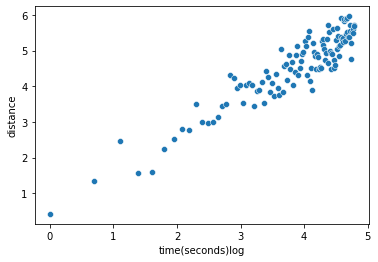

In [119]:
## Now, lett's make a scatter plot plot between this new transformed variable and distance
sns.scatterplot(x='time(seconds)log',y='distance',data=dist)
plt.show()

- Now we can see a fairly linear relationship between the two.
- Lets build a new model now.

### Bulinding the new model

In [120]:
## making X and y lables
X = dist['time(seconds)log']
y = dist['distance']

In [121]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(120,)
<class 'pandas.core.series.Series'>
(120,)
<class 'pandas.core.series.Series'>


In [123]:
## changing shape of X and y
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(120, 1)
<class 'numpy.ndarray'>
(120, 1)
<class 'numpy.ndarray'>


In [124]:
## importing libraries
from sklearn.linear_model import LinearRegression

In [125]:
## instantiating object
lr = LinearRegression()

In [126]:
## fitting into the object
lr = lr.fit(X,y)

In [127]:
## making predictions
y_pred = lr.predict(X)

In [128]:
## calculating R-Squared
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.8717123012103078

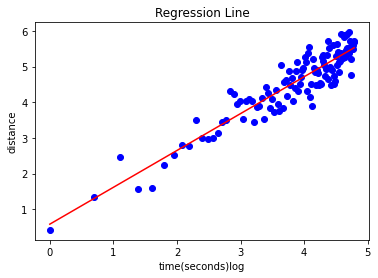

In [130]:
## checking out predictions on scatter plot
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red')
plt.title('Regression Line')
plt.xlabel('time(seconds)log')
plt.ylabel('distance')
plt.show()

In [131]:
## calculating the Coefficients
b0 = lr.intercept_
b1 = lr.coef_
print('The value of b0:',b0)
print('The value of b1:',b1)

The value of b0: [0.58066733]
The value of b1: [[1.03293534]]


### Calculating other metrics

In [132]:
## RSS; RSS = 𝛴(y - y_pred)²
RSS = np.sum(np.square(y-y_pred))
RSS

16.37260241134079

In [133]:
## MSE
n = len(X)
MSE = RSS/n
MSE

0.13643835342783991

In [134]:
## another way for MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y,y_pred))

0.13643835342783991


In [135]:
## RMSE; RMSE=√MSE
RMSE = MSE**.5
RMSE

0.36937562646693395

### Residual Ananlysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

In [136]:
## making the res varaible
res = y - y_pred

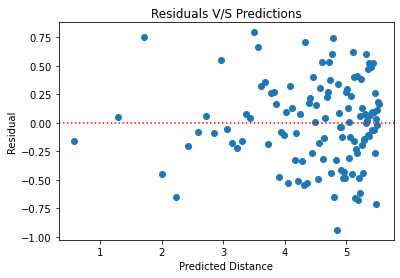

In [139]:
## plotting Residuals V/S Predictions
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red',linestyle=":")
plt.title('Residuals V/S Predictions')
plt.xlabel('Predicted Distance')
plt.ylabel('Residual')
plt.show()

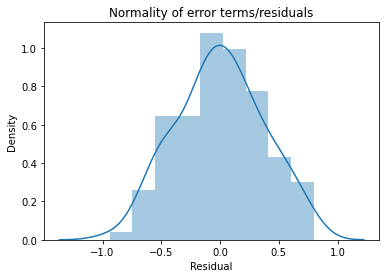

In [141]:
## distribution of erros
sns.distplot(res)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

- No violations of the Assumptions of linear regression.
- Model is now ok after data transformation

# Modeling non-linear relationship using Polynomial Regression

- Here, we need to make a model which predicts how much distance is covered by a truck in a given time unit after a break is applied.

In [142]:
## importing the dataset
data = pd.read_csv('test1.6.csv')

#### checking out the dataset 

In [143]:
## head
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [144]:
## shape
data.shape

(100, 3)

In [146]:
## null and types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


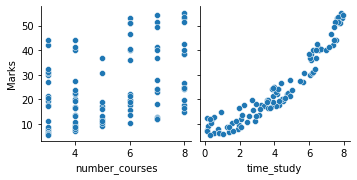

In [149]:
## checking out for linear relationships
sns.pairplot(x_vars=['number_courses','time_study'],y_vars = 'Marks',data = data,diag_kind=None)
plt.show()

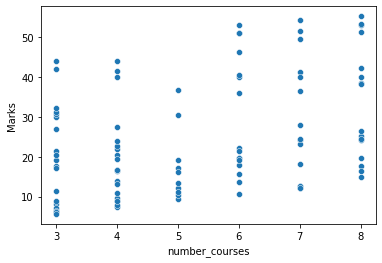

In [151]:
## Individual scatter plots
sns.scatterplot(x='number_courses',y='Marks',data=data)
plt.show()


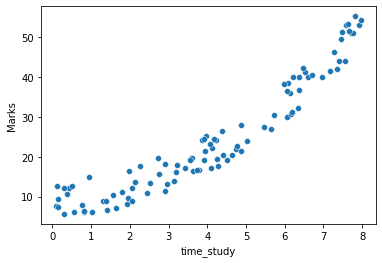

In [152]:
sns.scatterplot(x='time_study',y='Marks',data=data)
plt.show()

- No clear linear relationship, buur still we will build a LR model just fo demonstartion

### Building Linear Regression Model

In [154]:
## spltiing into X and y lables
X = data[['number_courses','time_study']]
y = data['Marks']

In [155]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(100, 2)
<class 'pandas.core.frame.DataFrame'>
(100,)
<class 'pandas.core.series.Series'>


- X is already 2-D, so no need to reshape it
- y is still a 1-D series, so we will reshape it

In [156]:
## reshaping y
y = np.array(y).reshape(-1,1)
print(y.shape)
print(type(y))

(100, 1)
<class 'numpy.ndarray'>


- Now X and y are ready to be fed into LinearRegression model

In [159]:
## importing libraries
from sklearn.linear_model import LinearRegression

In [160]:
# Making model
## instantiating the object
lr = LinearRegression()
## fitting
lr.fit(X,y)
## making predictions
y_pred = lr.predict(X)

In [162]:
## calculating R-Squared
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9403656320238896

In [163]:
## calculating b0 and b1
b0 = lr.intercept_
b1 = lr.coef_
print('The value of b0:',b0)
print('The value of b1:',b1)

The value of b0: [-7.45634623]
The value of b1: [[1.86405074 5.39917879]]


### Calculating other Metrics

In [166]:
## RSS:  RSS = 𝛴(y - y_pred)²
RSS = np.sum(np.square(y-y_pred))
print('The RSS is:',RSS)
## MSE; MSE = RSS/N
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
print('The MSE is:',MSE)
## RMSE; RMSE = √MSE
RMSE = MSE**.5
print('The RMSE is:',RMSE)

The RSS is: 1211.6962069108952
The MSE is: 12.116962069108952
The RMSE is: 3.4809426983374707


### Residual Ananlysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

## making res variable
res = y - y_pred

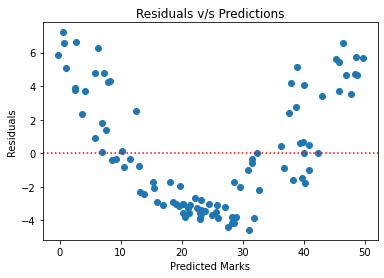

In [168]:
## Residuals v/s Predictions plot 
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s Predictions')
plt.xlabel('Predicted Marks')
plt.ylabel('Residuals')
plt.show()

- Residuals show a pattern around the zero line.

### We have to check which predictor variable is non-linearly related to the response variable
- We will be plotting residuals v/s each predictor varaible

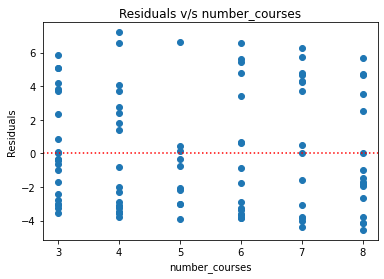

In [170]:
## Residuals v/s number_courses
plt.scatter(data['number_courses'],res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s number_courses')
plt.xlabel('number_courses')
plt.ylabel('Residuals')
plt.show()

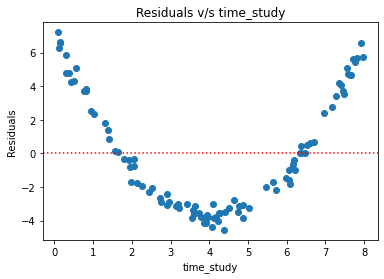

In [171]:
## Residuals v/s time_study
plt.scatter(data['time_study'],res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s time_study')
plt.xlabel('time_study')
plt.ylabel('Residuals')
plt.show()

- Clearly time_study is non-liinearly related to response varaible

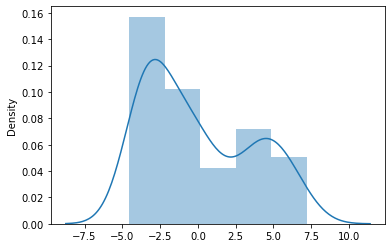

In [169]:
## Histogram of the error terms
sns.distplot(res)
plt.show()

- No normal distribution.

### Clear Violations of the assumptions of Linear Regression
- Let's try making the model through ploynomial regression

# Fitting Polynomial Regression Model 

- Since we saw that time_study variable was non-linearly related to the response variable, we will be tranforming it.

In [172]:
## transforming time_study
data['time_study_squared'] = np.square(data['time_study'])

In [173]:
data.head()

,number_courses,time_study,Marks,time_study_squared
0,3,4.508,19.202,20.322064
1,4,0.096,7.734,0.009216
2,4,3.133,13.811,9.815689
3,6,7.909,53.018,62.552281
4,8,7.811,55.299,61.011721


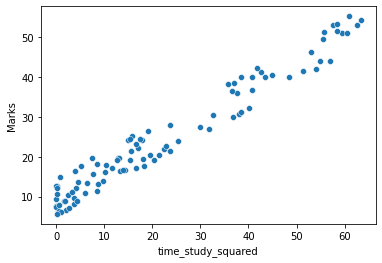

In [174]:
## Now let's see if this tranformatio helped
## plotting scatter plot between the tranformed vriable and response variable
sns.scatterplot(x ='time_study_squared',y='Marks', data=data)
plt.show()

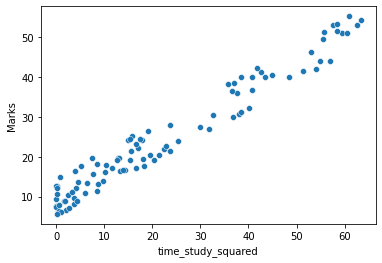

In [175]:
sns.scatterplot(x =data['time_study_squared'],y=data['Marks'])
plt.show()

- We can see that the tranformation helped and now we can begin building our model.

### Building Ploynomial Regression Model 

In [177]:
## splitting into X and y lables
X = data[['time_study','time_study_squared','number_courses']]
y = data['Marks']

In [178]:
## checking shapes and types for reshaping
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(100, 3)
<class 'pandas.core.frame.DataFrame'>
(100,)
<class 'pandas.core.series.Series'>


- NEED to reshape y

In [179]:
## reshaping y
y = np.array(y).reshape(-1,1)
print(y.shape)
print(type(y))

(100, 1)
<class 'numpy.ndarray'>


In [181]:
## importing libarries
from sklearn.linear_model import LinearRegression
## instantiiating object
lr = LinearRegression()
## fitting
lr.fit(X,y)
## predictions
y_pred = lr.predict(X)

In [184]:
## R_squared
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9996529294889802

In [186]:
## calculating b0 and b1
b0 = lr.intercept_
b1 = lr.coef_
print('The value of b0:',b0)
print('The value of b1:',b1)

The value of b0: [0.56299581]
The value of b1: [[-0.02855268  0.67346253  1.70546941]]


#### Calculating other metrics

In [187]:
## RSS:  RSS = 𝛴(y - y_pred)²
RSS = np.sum(np.square(y-y_pred))
print('The RSS is:',RSS)
## MSE; MSE = RSS/N
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
print('The MSE is:',MSE)
## RMSE; RMSE = √MSE
RMSE = MSE**.5
print('The RMSE is:',RMSE)

The RSS is: 7.05204123068379
The MSE is: 0.0705204123068379
The RMSE is: 0.2655567967626472


### Checking model fit
- We will make scatter plot of y v/s y_pred for each independent varaible

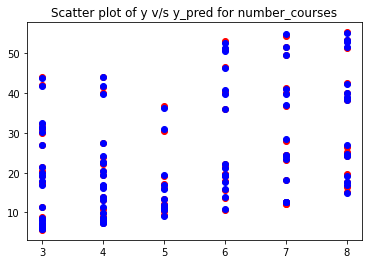

In [199]:
## scatter plot for number_courses
plt.scatter(X['number_courses'],y,color='red')
plt.scatter(X['number_courses'],y_pred,color='blue')
plt.title('Scatter plot of y v/s y_pred for number_courses')
plt.show()

- To good of a fit

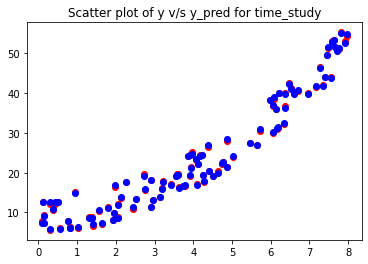

In [200]:
## scatter plot for time_study
plt.scatter(X['time_study'],y,color='red')
plt.scatter(X['time_study'],y_pred,color='blue')
plt.title('Scatter plot of y v/s y_pred for time_study')
plt.show()

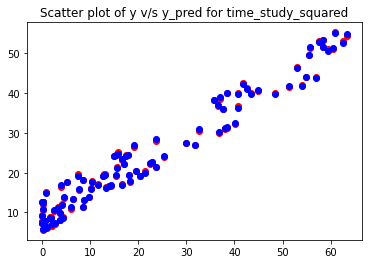

In [201]:
## scatter plot for time_study_squared
plt.scatter(X['time_study_squared'],y,color='red')
plt.scatter(X['time_study_squared'],y_pred,color='blue')
plt.title('Scatter plot of y v/s y_pred for time_study_squared')
plt.show()

- Too good of a fit in all cases

### Residual Ananlysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

In [195]:
## making res variable
res = y - y_pred

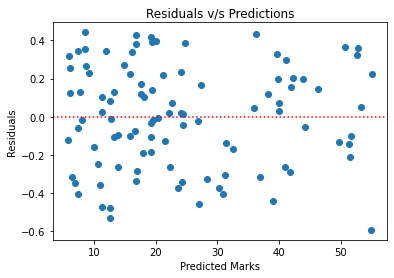

In [196]:
## Residuals v/s Predictions plot
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s Predictions')
plt.xlabel('Predicted Marks')
plt.ylabel('Residuals')
plt.show()

- Resduals are randomly distributed with no pattern

#### Plotting predictor variables against residuals  to check for any non-linearity

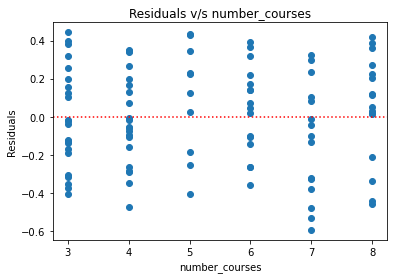

In [202]:
## Residuals v/s number_courses plot
plt.scatter(X['number_courses'],res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s number_courses')
plt.xlabel('number_courses')
plt.ylabel('Residuals')
plt.show()

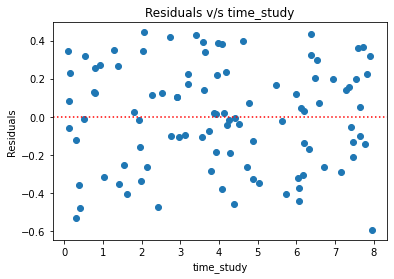

In [203]:
## Residuals v/s time_study plot
plt.scatter(X['time_study'],res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s time_study')
plt.xlabel('time_study')
plt.ylabel('Residuals')
plt.show()

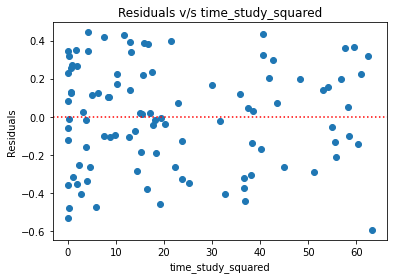

In [204]:
## Residuals v/s time_study_squared plot
plt.scatter(X['time_study_squared'],res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s time_study_squared')
plt.xlabel('time_study_squared')
plt.ylabel('Residuals')
plt.show()

- For each independent variable, the Resduals are randomly distributed with no pattern

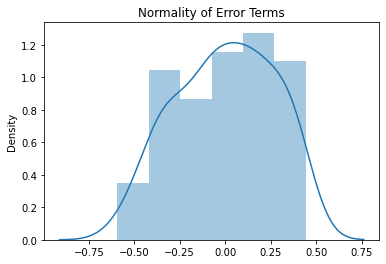

In [206]:
## Histogram of the error terms
sns.distplot(res)
plt.title('Normality of Error Terms')
plt.show()

- Fairly normal distribution 
- No violations of assumptions of linear regression
- The model is good enough